<a href="https://colab.research.google.com/github/RibasArtur/DataScienceProjects/blob/main/Buenos_Aires_Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Airbnb Data Analysis - *Buenos Aires*

Welcome to my first data exploration, really beginner level. I enjoyed going through the [Airbnb](https://www.airbnb.com.br/) data for Buenos Aires because of a trip there that my wife and I took when we still lived on the border between Brazil and Argentina.

Airbnb makes some data available on the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) for the main city of the world and we can have some fun with it.
Let's see what insights we can take by these data.

## Getting the Data


In [ ]:
# importing useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#this command allows display the output directly below the code cell
%matplotlib inline


In [ ]:
# importing the file listings.csv to a dataframe
df = pd.read_csv('http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2023-03-29/visualisations/listings.csv')


**First of all, let's take a look at the first five entries and get familiar with the data.**

In [ ]:
#show the first 5 entries
df.head()

id                                               name  \
0  754575236856053576                      Piso en el corazón de Palermo   
1               52511                 San Telmo Apartment (Buenos Aires)   
2            10310216                         New house in Palermo Viejo   
3            46337035  Dueño alquila departamento 2 ambientes en Reco...   
4            53357436      Hermoso departamento en Retiro. Cerca de Todo   

     host_id  host_name  neighbourhood_group neighbourhood   latitude  \
0   32969364  Florencia                  NaN       Palermo -34.588945   
1     242939        Gri                  NaN   San Nicolas -34.607670   
2    4986026    Heloise                  NaN       Palermo -34.595310   
3  336309260      Pablo                  NaN        Retiro -34.593100   
4   42201748     Martin                  NaN        Retiro -34.596670   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -58.411684  Entire home/apt  21635               7                  2   
1 -58.372570  Entire home/apt  14495               4                  0   
2 -58.422290  Entire home/apt   9642               5                 19   
3 -58.386490  Entire home/apt  10000               6                  0   
4 -58.375420  Entire home/apt   9940               2                  1   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-03-08               0.81                               1   
1         NaN                NaN                               1   
2  2022-12-05               0.22                              16   
3         NaN                NaN                               1   
4  2022-02-18               0.07                               1   

   availability_365  number_of_reviews_ltm license  
0                93                      2     NaN  
1               365                      0     NaN  
2               319                      5     NaN  
3               270                      0     NaN  
4               328                      0     NaN

**We can see just the columns names using .keys()**

In [ ]:
df.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

**Data Dictionary from Inside Airbnb**

* id -  Airbnb's unique identifier for the listing
* name - property's name
* host_id - host's id
* host_name - host's name
* neighbourhood_group - The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
* neighbourhood - the neighbourhood
* latitude - Uses the World Geodetic System (WGS84) projection for latitude and longitude.
* longitude - Uses the World Geodetic System (WGS84) projection for latitude and longitude.
* room_type - Entire home/apt|Private room|Shared room|Hotel
* price - daily price in local currency (pesos argentinos in this case)
* minimum_nights - minimum number of night stay for the listing (calendar rules may be different)
* number_of_reviews - The number of reviews the listing has
* last_review - The date of the last/newest review
* calculated_host_listings_count - The number of listings the host has in the current scrape, in the city/region geography.
* availability_365 - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
* number_of_reviews_ltm - The number of reviews the listing has (in the last 12 months)
* license - The licence/permit/registration number.


### **How many variables we have? what the type of these variables?**

In [ ]:
# identifying the data volume
print(df.shape)
# identifying each data type
df.dtypes

(22713, 18)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **What is the percentage of null values in this dataset?**

In [ ]:
# sorting by null values percentage in descending order
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
license                            98.005547
reviews_per_month                  18.148197
last_review                        18.148197
name                                0.008806
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

** We can see that we don't have information for neighbourhood_group and license.

### **What about the variable distribution?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'neighbourhood_group'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>]], dtype=object)

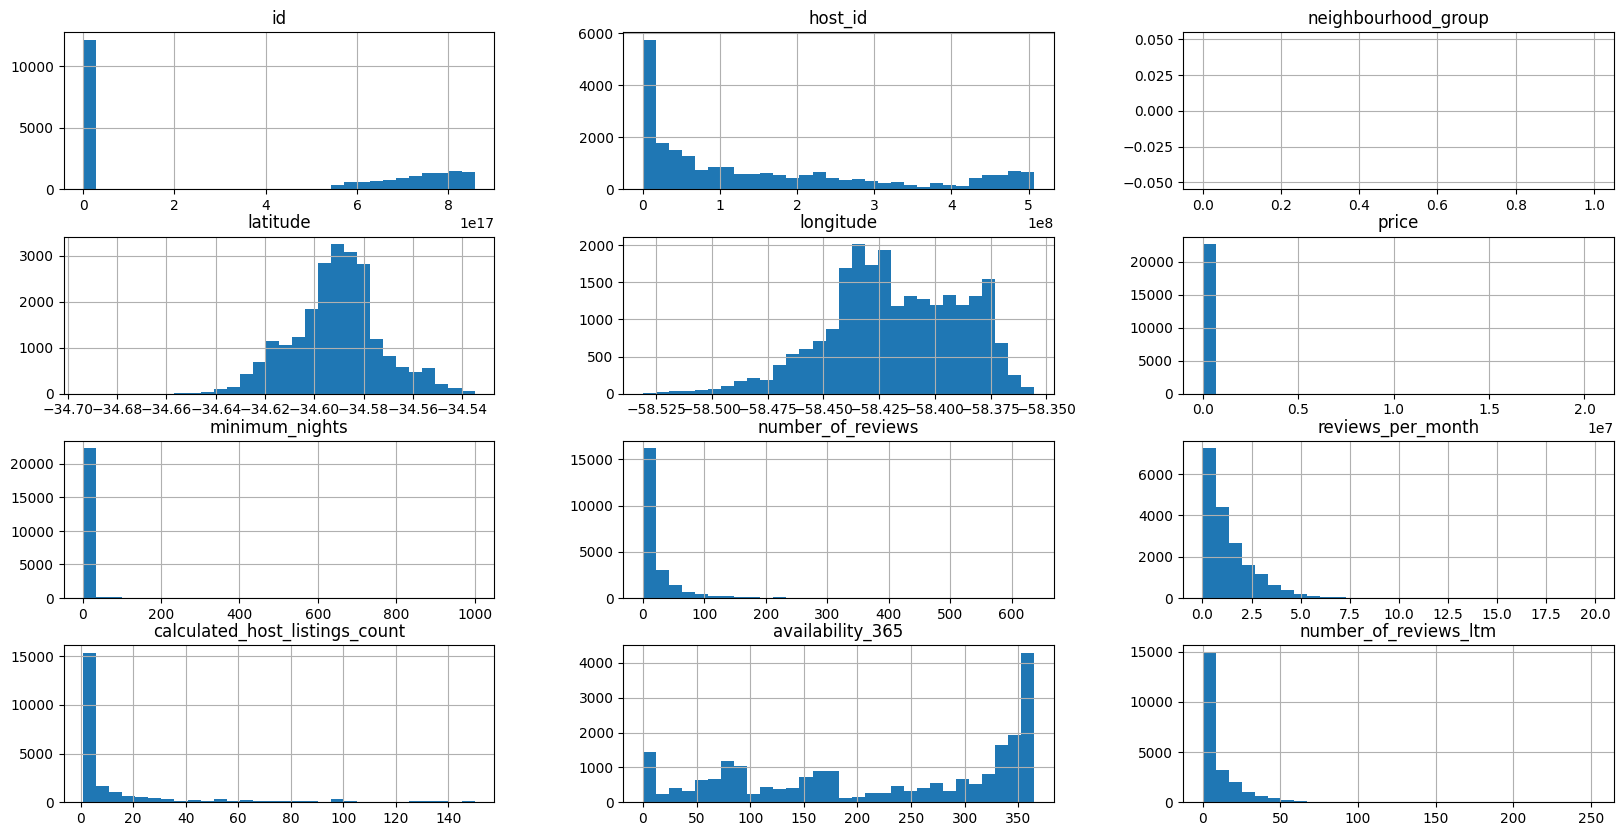

In [ ]:
n_bins = 30
# plotting the numerical variables histograms
df.hist(figsize=(20,10),bins= n_bins)  #bin is the quantity of vertical rectangles and figsize is figure size)

### **What is the price mean?**

In [ ]:
# show the price column mean
df.price.mean()

15467.439087747105

### **Statistical Summary**
Using .describe() just in the data that interest me.

In [ ]:
df[['availability_365', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()

availability_365         price  minimum_nights  number_of_reviews  \
count       22713.00000  2.271300e+04    22713.000000       22713.000000   
mean          220.00383  1.546744e+04        6.823713          22.107692   
std           125.73458  1.484434e+05       27.260066          38.799835   
min             0.00000  1.750000e+02        1.000000           0.000000   
25%            89.00000  6.388000e+03        2.000000           1.000000   
50%           248.00000  8.969000e+03        3.000000           8.000000   
75%           344.00000  1.346000e+04        5.000000          25.000000   
max           365.00000  2.050043e+07     1000.000000         637.000000   

       reviews_per_month  
count       18591.000000  
mean            1.347491  
std             1.342263  
min             0.010000  
25%             0.370000  
50%             0.980000  
75%             1.980000  
max            19.940000

**We can see that the column minimum_nights has values above 365 days. Those values are outliers.  We can detect those outliers ploting a boxplot and set a limit of minimum_nights in our analysis. Values above 30 days of minimum nights are not interesting to me because a vacation generally has a maximum of 30 days**


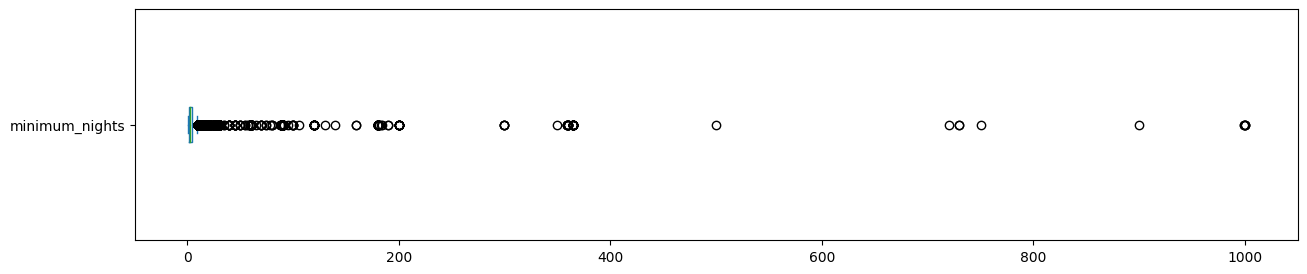

In [ ]:
#boxplot for minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [ ]:
#values of minimum_nights>30
print("values of minimum_nights above 30: {} entries".format(len(df[df.minimum_nights >30])))  #absolute amount
print("relative amount: {:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))  #relative amount

values of minimum_nights above 30: 399 entries
relative amount: 1.7567%


**It would be useful plot a boxplot to detect outliers in the column price.**

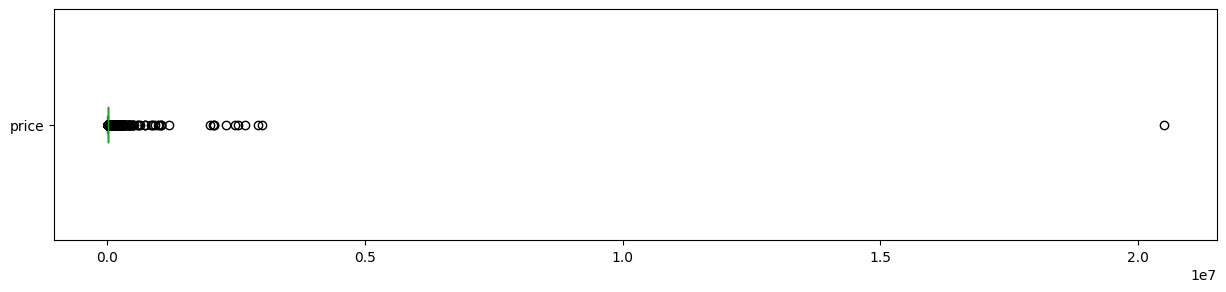

In [ ]:
#boxplot for price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

**I am looking for a place to stay in Buenos Aires, so I want know the amount that I CAN NOT pay: 300 reais(Brazil) =~ 15365 pesos(Argentina).**

In [ ]:
print("price:values above 300 reais=15365 pesos:")
print("{} entradas".format(len(df[df.price>15365]))) #quantidade absoluta do que eu não posso pagar
print("{:.2f}%".format((len(df[df.price>15365])/df.shape[0])*100)) #quantidade relativa do que eu não posso pagar

price:values above 300 reais=15365 pesos:
4435 entradas
19.53%


**There are a lot good stays that I can not pay...
Now, let's plot a histogram for the numeric variables**

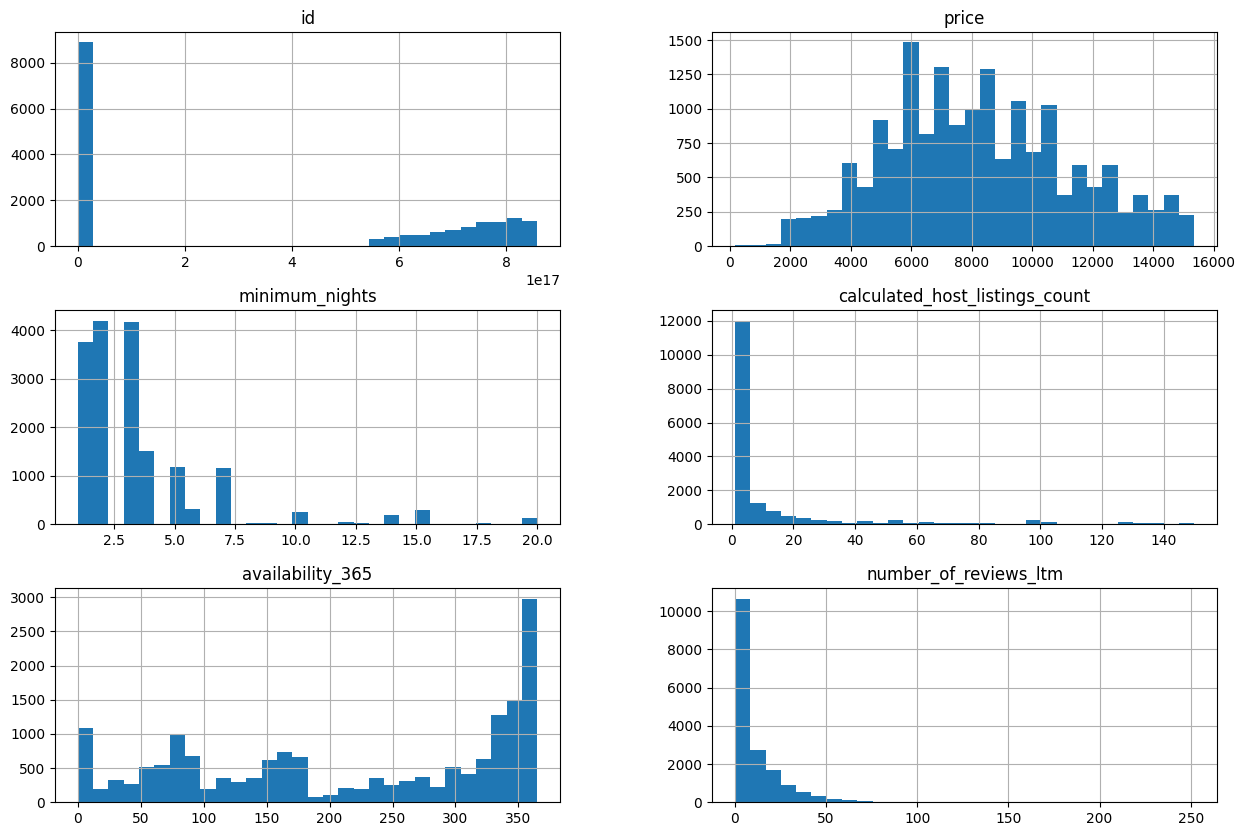

In [ ]:
#removing outliers
df_clean = df.copy() #df_clean gets a copy of df
df_clean.drop(df_clean[df_clean.price>15365].index, axis=0, inplace=True) #It just interest me places that I can pay.
df_clean.drop(df_clean[df_clean.minimum_nights>20].index, axis=0, inplace=True) #It just interest me places that allows me stay less than 20 days.

# removing neighbourhood_group cause it's totally null
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('latitude', axis=1, inplace=True)
df_clean.drop('longitude', axis=1, inplace=True)
df_clean.drop('number_of_reviews', axis=1, inplace=True) # the number of reviews is not important for my analysis, cause I could stay in a place newly registered.
df_clean.drop('host_id', axis=1, inplace=True)
df_clean.drop('reviews_per_month', axis=1, inplace=True)


#plotting
df_clean.hist(bins=n_bins, figsize=(15,10));

<Axes: >

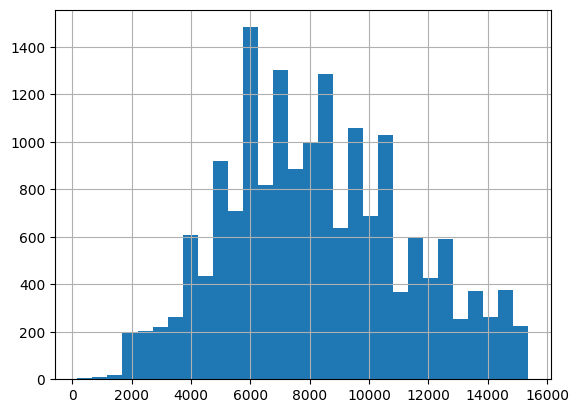

In [ ]:
#showing only the prices < 300 reais
df_clean.price.hist(bins=n_bins)

<Axes: >

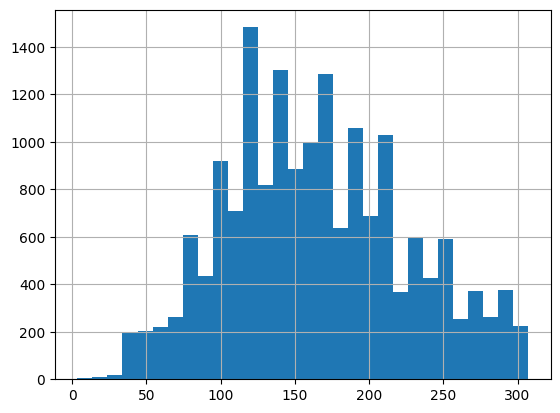

In [ ]:
df_clean.price = df_clean.price.mul(other=0.020, axis=0) #transformando os preços para reais
df_clean.price.hist(bins=n_bins)

### **What are the correlations between the variables?**

In [ ]:
#correlation is the relation between two things
#find the correlation coefficient
corr = df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].corr()
display(corr)

price  minimum_nights  number_of_reviews  \
price              1.000000        0.009979          -0.012252   
minimum_nights     0.009979        1.000000          -0.052152   
number_of_reviews -0.012252       -0.052152           1.000000   
reviews_per_month -0.016617       -0.109007           0.283740   
availability_365  -0.005934        0.014694          -0.050773   

                   reviews_per_month  availability_365  
price                      -0.016617         -0.005934  
minimum_nights             -0.109007          0.014694  
number_of_reviews           0.283740         -0.050773  
reviews_per_month           1.000000          0.061319  
availability_365            0.061319          1.000000

**The correlation is as big as more near of 1.**


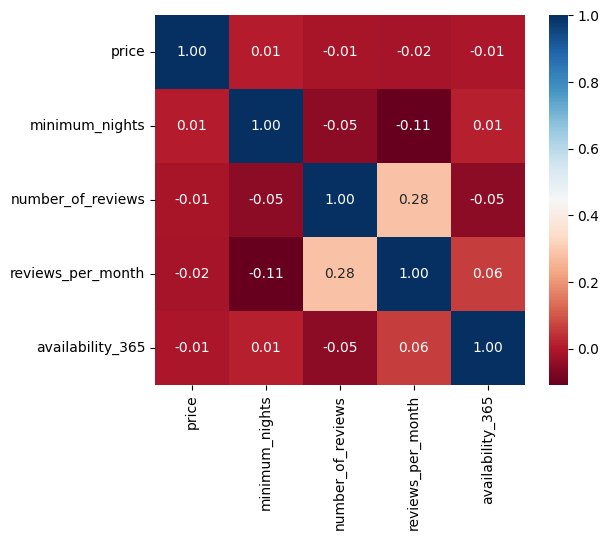

In [ ]:
# plot a heatmap with seaborn library using the correlations
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **What is the most available room_type?**

In [ ]:
# showing the amount of each type of room_type
df_clean.room_type.value_counts()

Entire home/apt    15221
Private room        1808
Shared room          135
Hotel room            68
Name: room_type, dtype: int64

In [ ]:
# the percentage of each room_type
df_clean.room_type.value_counts()/df_clean.shape[0] * 100

Entire home/apt    88.329851
Private room       10.492108
Shared room         0.783426
Hotel room          0.394615
Name: room_type, dtype: float64

### **What is the most expensive neighbourhood ? It's interesting to use the mean**



In [ ]:
# using .groupby([]) to find the most expensive neighourhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    12003.763636
Palermo           9100.978022
Belgrano          8588.257506
Recoleta          8559.221298
Colegiales        8344.157005
Nuñez             8319.466146
Retiro            8120.203410
San Nicolas       7917.365487
Barracas          7887.731884
Villa Crespo      7758.452269
Name: price, dtype: float64

**We can plot the rooms by latitude and longitude. It's a good technique to see the grographical distribution.**

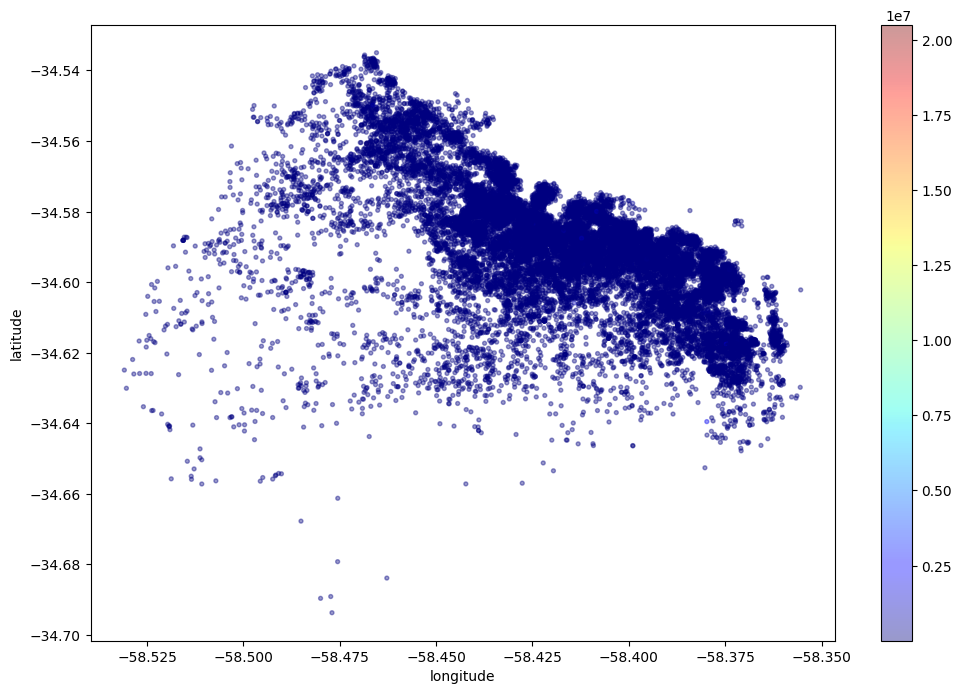

In [ ]:
# plotting by lat and long
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **What's the mean of minimum_nights?**

In [ ]:
df_clean.minimum_nights.mean()

3.482126276694522

##**Finally, I guess we have data enough to decide where to stay in this romantic city of Buenos Aires!**

##**Conclusion**
It was my first approach into data analysis using phyton. We could get good insights from these data, because of the histograms, the classificantion of prices and mainly because I knew what I wanted and my limits. We stayed in the neighbourhood of San Nicolas. It is in the 8th position of most expensive price mean neighbourhood, so we can pick a place with a fair price very near the famous Obelisk and could visit many places walking around the city, without needing uber. To finish, I will post a photo as a good memory of my wife and I in Buenos Aires.

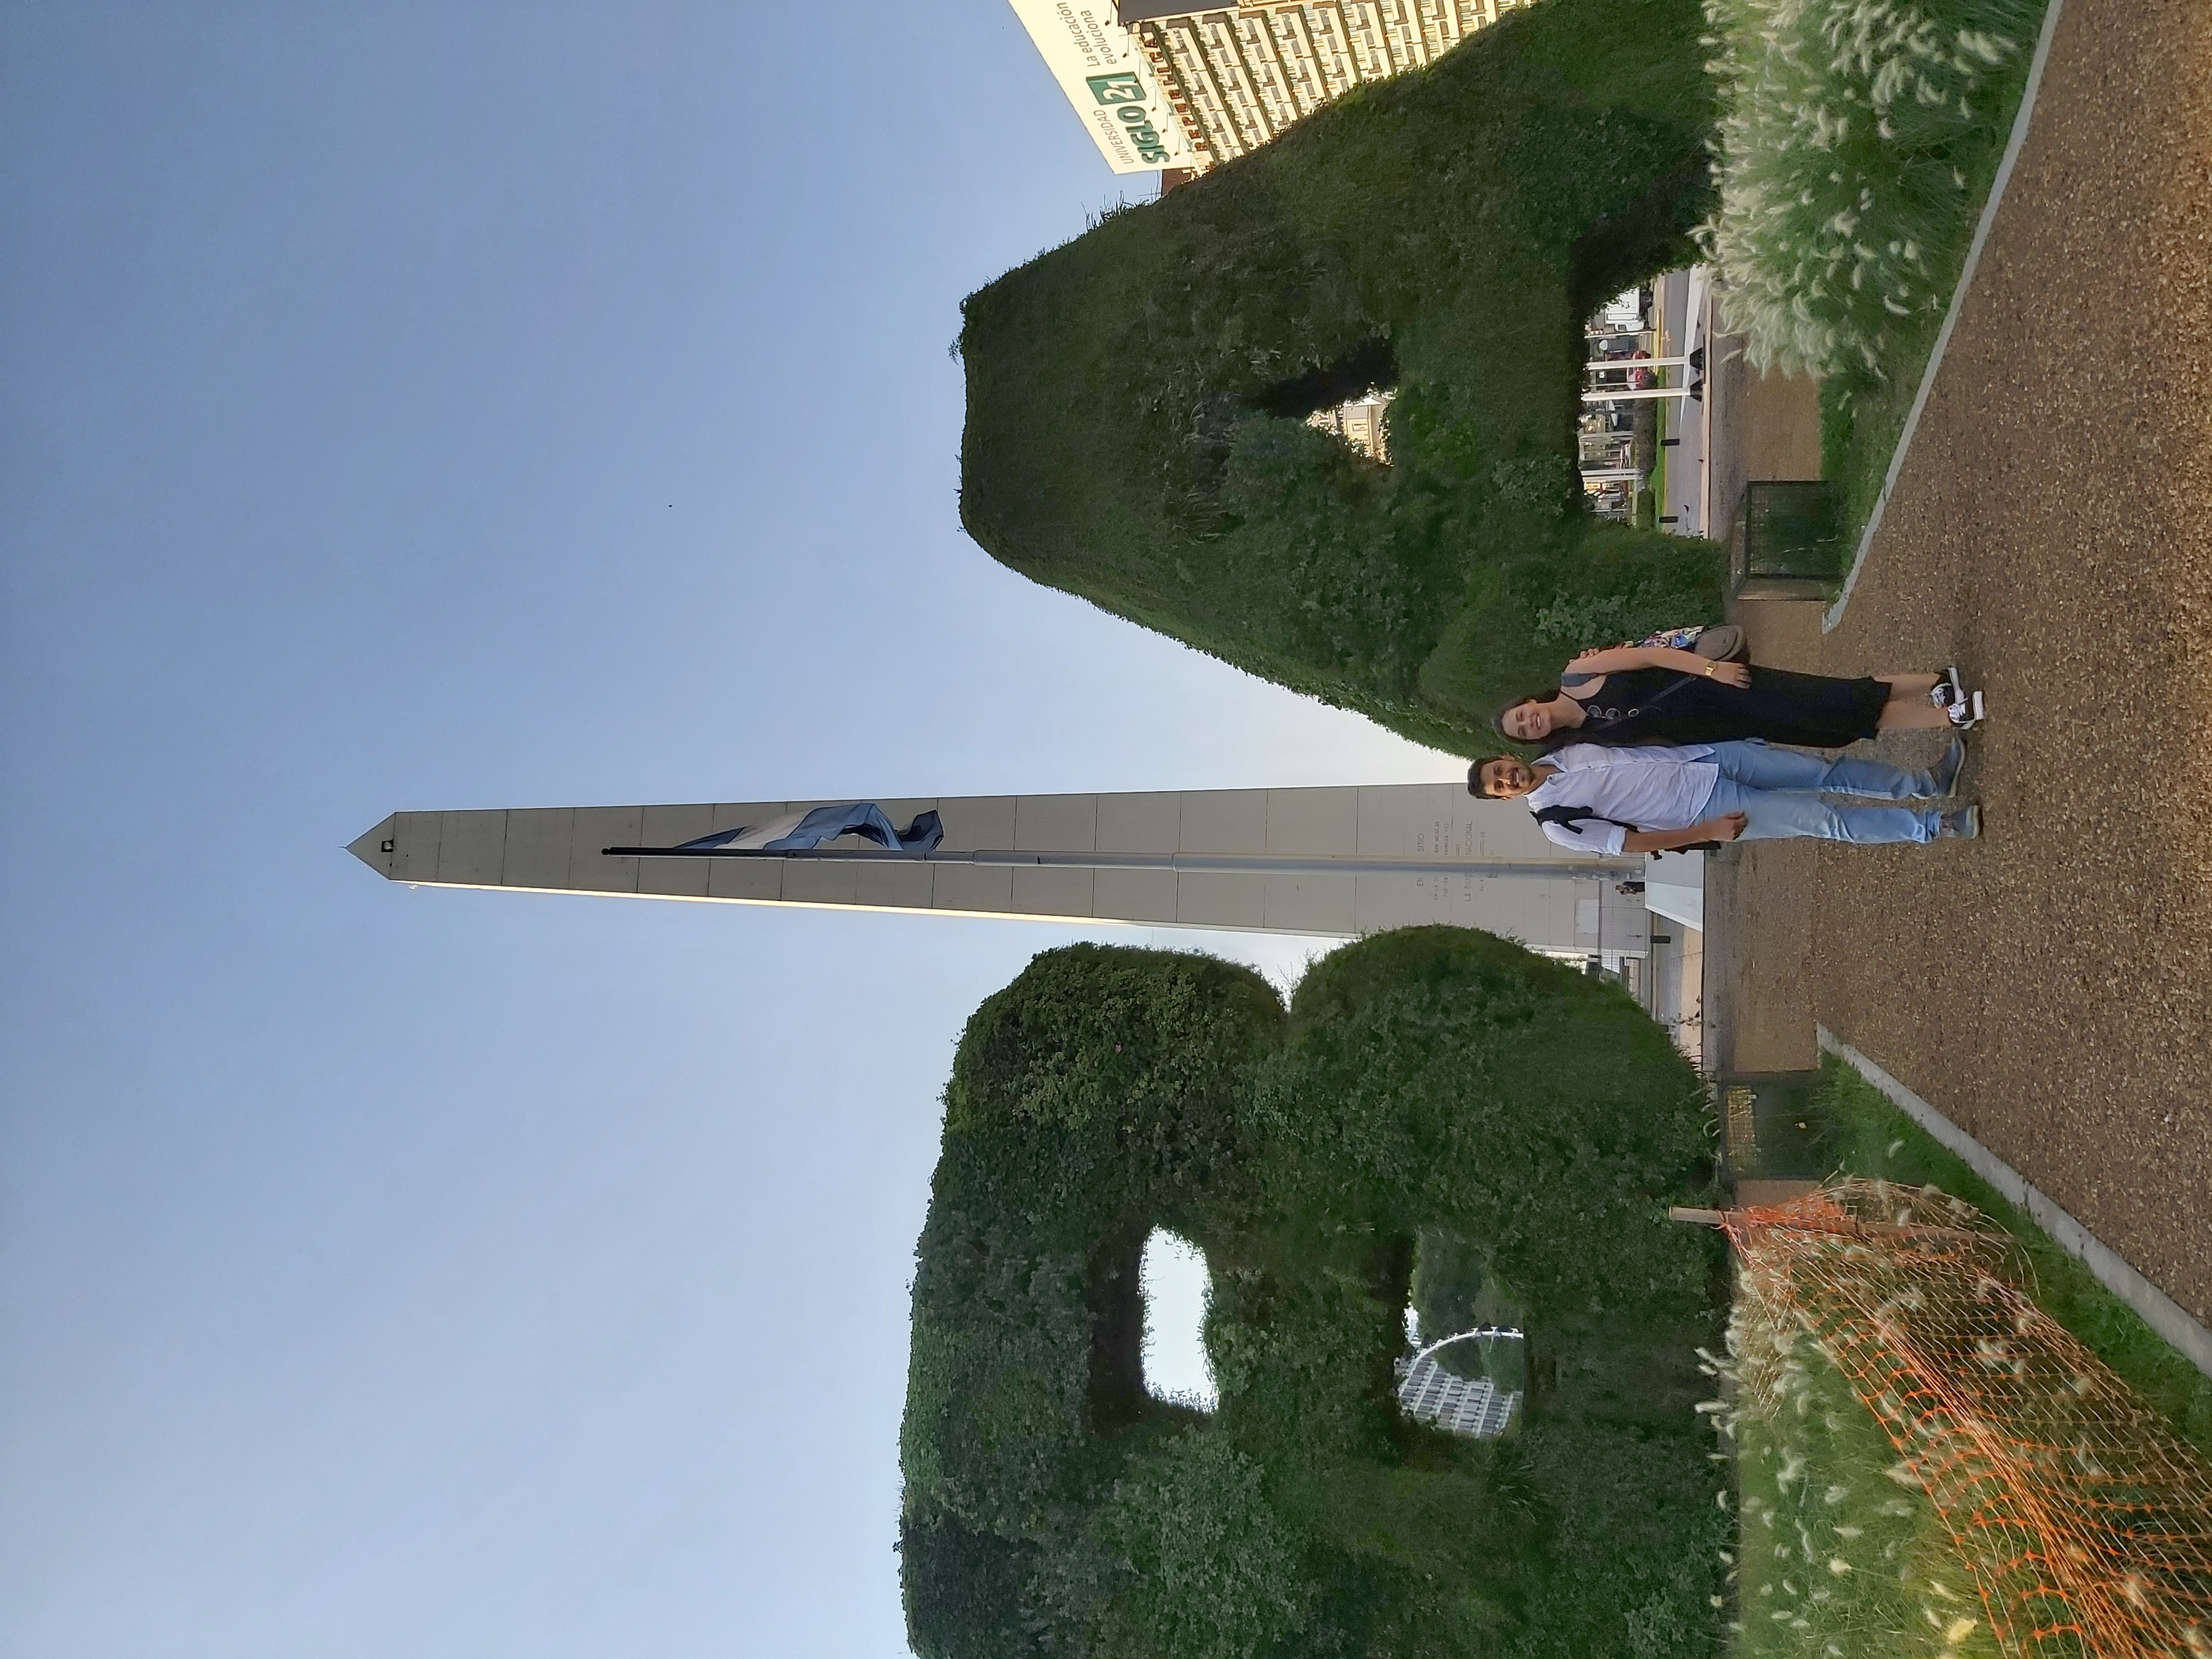

In [ ]:
from IPython.display import Image
Image(filename='/content/20200108_071643.jpg',width=500,height=500)

